In [1]:
import numpy as np

In [2]:
n1, n2 = 40, 30
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[1,0.1],[0.1,1]])
amostra1 = np.random.multivariate_normal(mu_vec1, cov_mat1, n1).T


mu_vec2 = np.array([2,-2])
cov_mat2 = np.array([[1,0.1],[0.1,1]])
amostra2 = np.random.multivariate_normal(mu_vec2, cov_mat2, n2).T


In [3]:
%pylab inline
from matplotlib import pyplot as plt


Populating the interactive namespace from numpy and matplotlib


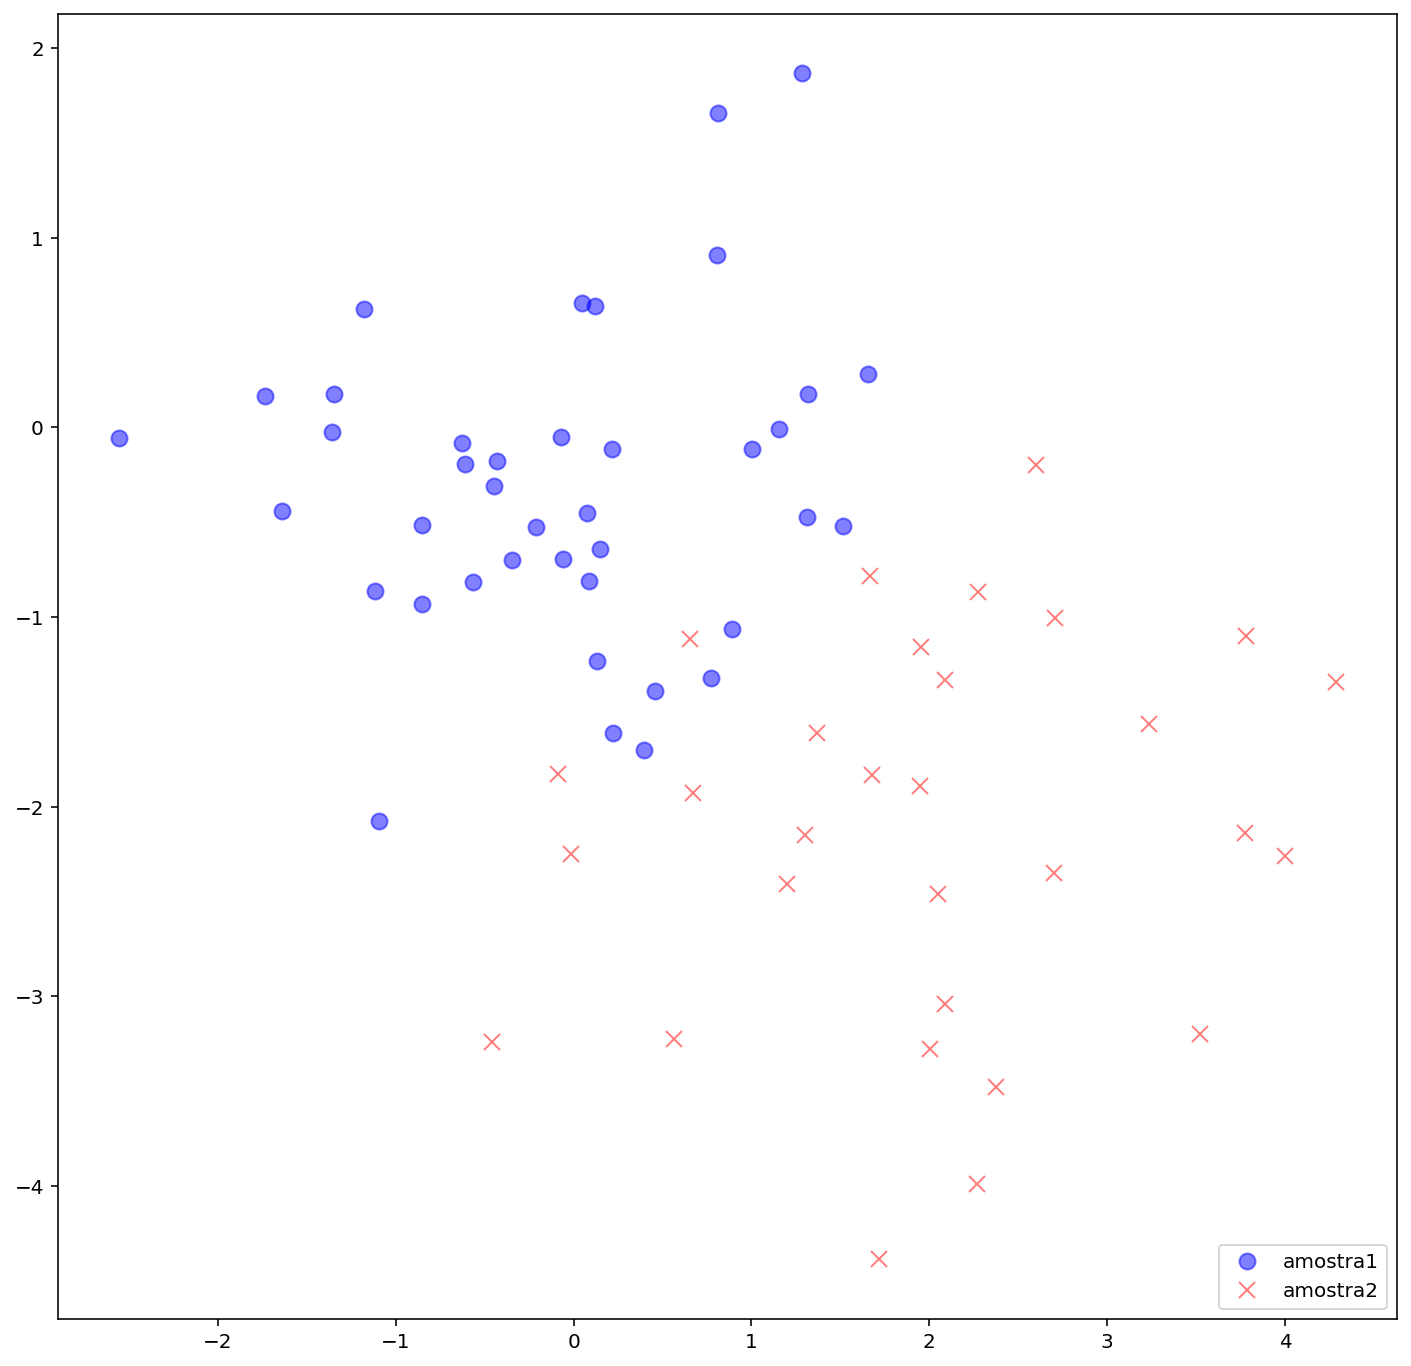

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
plt.rcParams['legend.fontsize'] = 10   
ax.plot(amostra1[0,:], amostra1[1,:], 'o', markersize=8, color='blue', alpha=0.5, label='amostra1')
ax.plot(amostra2[0,:], amostra2[1,:], 'x', markersize=8, alpha=0.5, color='red', label='amostra2')

ax.legend(loc='lower right')
plt.show()

In [5]:
media1 = np.mean(amostra1,1)
media2 = np.mean(amostra2,1)

In [6]:
media1, media2

(array([-0.06766375, -0.3189165 ]), array([ 1.99641002, -2.11320195]))

In [7]:
amostra = np.concatenate((amostra1, amostra2), axis=1)
media=np.mean(amostra, 1)
media

array([ 0.8169393 , -1.08789598])

In [8]:
sc1 = np.zeros((2,2))
for i in range(amostra1.shape[1]):
    sc1 += (amostra1[:,i].reshape(2,1) - media1).dot((amostra1[:,i].reshape(2,1) - media1).T)
print('Scatter Matrix S1:\n', sc1)


Scatter Matrix S1:
 [[79.22941614  8.42035976]
 [ 8.42035976 55.39260637]]


In [9]:
sc2 = np.zeros((2,2))
for i in range(amostra2.shape[1]):
    sc2 += (amostra2[:,i].reshape(2,1) - media2).dot((amostra2[:,i].reshape(2,1) - media2).T)
print('Scatter Matrix S2:\n', sc2)

Scatter Matrix S2:
 [[592.61055198  11.49465208]
 [ 11.49465208 566.44347296]]


In [10]:
sw = sc1 + sc2

In [11]:
sb=n1*(media1-media).reshape(2,1).dot((media1-media).reshape(1,2)) +n2*(media2-media).reshape(2,1).dot((media2-media).reshape(1,2))
sb

array([[ 73.03543735, -63.48921485],
       [-63.48921485,  55.19074779]])

In [12]:
swsb=inv(sw).dot(sb)

In [13]:
swsb

array([[ 0.11184224, -0.09722371],
       [-0.10568148,  0.0918682 ]])

In [32]:
valprop, vect_prop = np.linalg.eig(swsb)

In [33]:
valprop

array([ 2.03710434e-01, -2.77555756e-17])

In [34]:
vect_prop

array([[ 0.72684218,  0.65606184],
       [-0.68680452,  0.75470714]])

In [35]:
vect_prop[:,0].reshape(1,2).dot(sw.dot(vect_prop[:,1].reshape(2,1)))

array([[0.]])

In [36]:
valprop

array([ 2.03710434e-01, -2.77555756e-17])

In [39]:
w=vect_prop[:,0].reshape(2,1)

In [40]:
w

array([[ 0.72684218],
       [-0.68680452]])

In [41]:
proj1 = (w.T).dot(amostra1)
proj2 = (w.T).dot(amostra2)

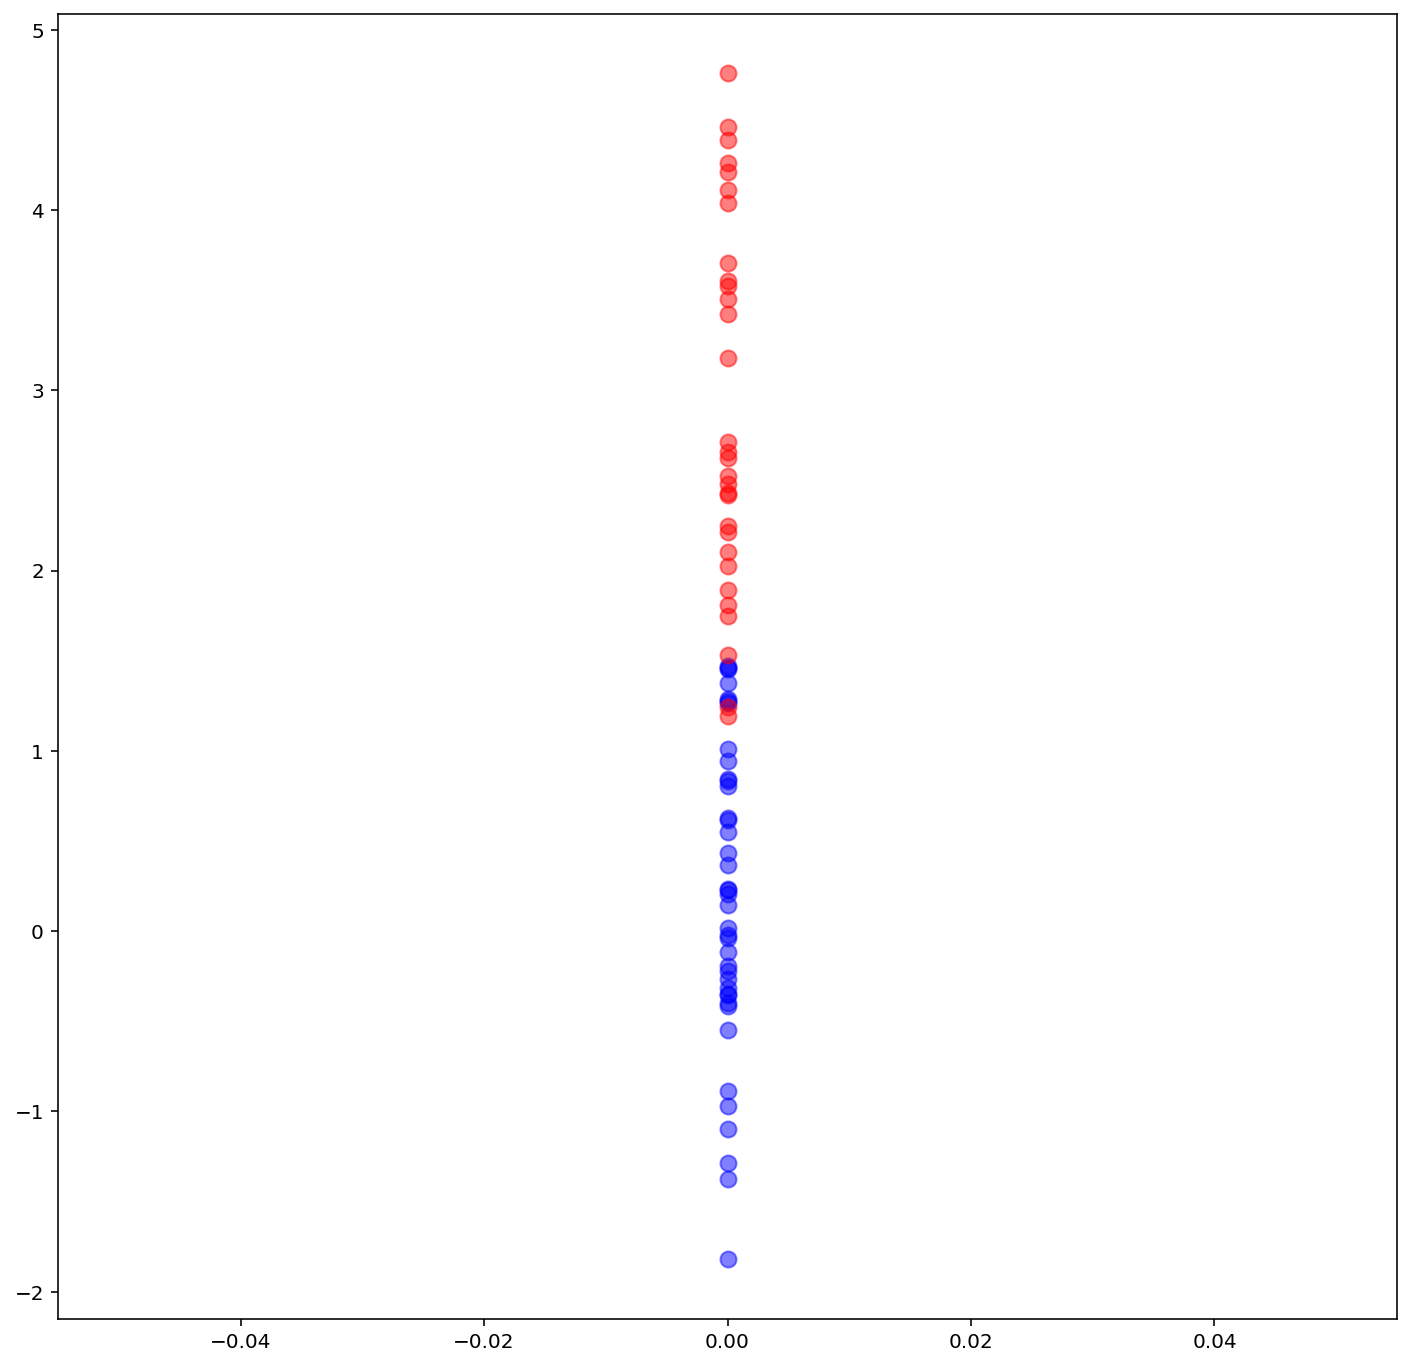

In [42]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
plt.rcParams['legend.fontsize'] = 10   
 
ax.plot(proj1, 'o', markersize=8, alpha=0.5, color='blue')
ax.plot(proj2, 'o', markersize=8, alpha=0.5, color='red')

plt.show()

